Testing the Prism (https://prism.oregonstate.edu/downloads/) precipitation data to see if this should be one of the variables in my model. The precipitation data is supposed to be highly accurate as it uses ground readings. However, the data also go through updates as more data is recorded. I will be using the first iteration of the data as I need to work with real time data, so I'm not sure if it will be superior (or robust enough) in comparison with something like GFS, which is the most real time, but only uses land models and is low spatial resolution. Another alternative to PRISM is GridMET data through Microsft Planetary computer (https://planetarycomputer.microsoft.com/dataset/gridmet)

http url template: https://services.nacse.org/prism/data/get/<region>/<res>/<element>/<date><?format=[nc|asc|bil]>

In [2]:
import requests
import zipfile
import io
import xarray as xr

In [20]:
date = 20250622

url = f"https://services.nacse.org/prism/data/get/us/800m/ppt/{date}?format=nc"

response = requests.get(url)

    


In [21]:
if response.ok:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Print list of files in the zip
        print("Contents of zip:", z.namelist())
        
        nc_filename = [name for name in z.namelist() if name.endswith(".nc")][0]

        z.extract(nc_filename, path="data/prism")
        # ds = xr.open_dataset(f"./downloads/{nc_filename}")

        # with open(f"data/prism/prism_ppt_{date}.zip", "wb") as f:
        #     f.write(response.content)
        #     print("download successful")
else:
    print(f"Error {response.status_code}: {response.text}")

Contents of zip: ['prism_ppt_us_30s_20250622.info.txt', 'prism_ppt_us_30s_20250622.nc', 'prism_ppt_us_30s_20250622.nc.aux.xml', 'prism_ppt_us_30s_20250622.prj', 'prism_ppt_us_30s_20250622.stn.csv', 'prism_ppt_us_30s_20250622.stx', 'prism_ppt_us_30s_20250622.xml']


In [3]:
ds = xr.open_dataset("data/prism/prism_ppt_20250623/prism_ppt_us_30s_20250623.nc", engine="netcdf4")


In [24]:
ds

<xarray.Dataset> Size: 87MB
Dimensions:  (lat: 3105, lon: 7025)
Coordinates:
  * lat      (lat) float64 25kB 24.07 24.08 24.08 24.09 ... 49.92 49.92 49.93
  * lon      (lon) float64 56kB -125.0 -125.0 -125.0 ... -66.5 -66.49 -66.48
Data variables:
    crs      |S1 1B ...
    Band1    (lat, lon) float32 87MB ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.4.3, released 2022/04/22
    history:      Tue Jun 24 12:28:19 2025: GDAL CreateCopy( /nfs/pancake/u5/...

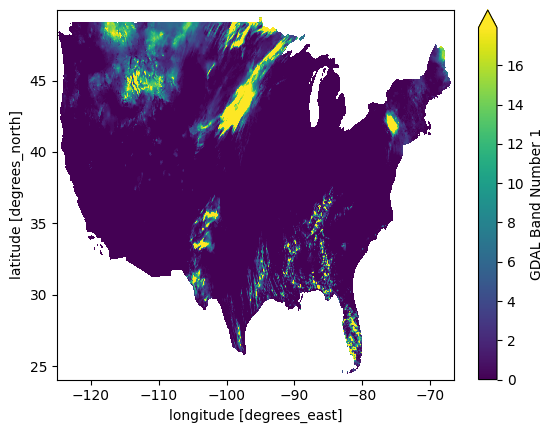

In [4]:
ds['Band1'].plot(robust=True)